Part A:

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 
matX = np.random.normal(2, 0.01, (100, 10))
# matX = np.append(np.ones((100,1)), matX, axis = 1)

# 2.
matY = np.random.uniform(2, 1, (100, 1))

print(matX.shape)
print(matY.shape)

(100, 10)
(100, 1)


In [84]:
#3.
matB = np.matmul(matX.T, matY)
matA = np.matmul(matX.T, matX)

#4.
#Gaussian Elimination
n = len(matA)
for k in range(1, n-1):
    for i in range(k+1, n):
        matA[i,k] = matA[i,k] / matA[k,k]
        for j in range(k+1, n):
            matA[i,j] = matA[i,j] - matA[i,k] * matX[k,j]


#Forward Elimination
for k in range(1,n-1):
    for i in range(k+1, n):
        matB[i] = matB[i] - matA[i,k] * matB[k]


#Backward Solve
res = np.zeros(n)

for i in range(n-1,-1,-1):
    summ = matB[i]
    for j in range(i+1, n):
        summ = summ - matA[i,j]*res[j]
    res[i] = summ / matA[i,i]
    
res

array([ 1.22839952e-04,  7.36559140e-01, -1.56445690e-04,  4.55184900e-04,
       -4.53209062e-04,  2.92138803e-04, -1.91242319e-05, -1.67496364e-04,
        7.60237436e-05,  1.72020525e-05])

In [87]:
#5.
matPredY = np.matmul(matX, res)


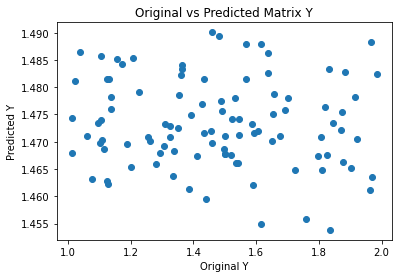

In [88]:
# 6.
plt.scatter(matY, matPredY)
plt.xlabel("Original Y", size = 10)
plt.ylabel("Predicted Y", size = 10)
plt.title("Original vs Predicted Matrix Y", size = 12)
plt.show()

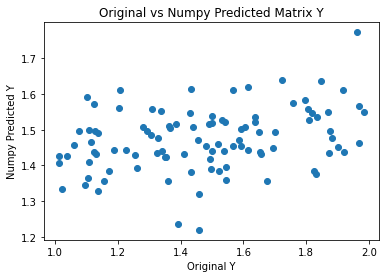

In [152]:
#7.
matBetaAuto = np.linalg.lstsq(matX, matY, rcond = None)[0]
matPredYAuto = np.matmul(matX, matBetaAuto)

plt.scatter(matY, matPredYAuto)
plt.xlabel("Original Y", size = 10)
plt.ylabel("Numpy Predicted Y", size = 10)
plt.title("Original vs Numpy Predicted Matrix Y", size = 12)
plt.show()

Part B:

In [153]:
import pandas as pd
from numpy.linalg import inv

#a.
df_train = pd.read_csv("train.csv")
df_store = pd.read_csv("store.csv")

df_merged = df_train.merge(df_store, how = 'inner', on = 'Store')

df_sorted = df_merged.sort_values('Date', ascending = True)

len(df_store)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1115

In [154]:
#b.
storeSalesMap = {}
storeId = 1
numStores = len(df_store)

for i in range(1, len(df_store) + 1):
    storeSalesMap[storeId] = df_sorted[df_sorted['Store'] == i]['Sales'].values
    storeId+=1

df_storeSalesMap = pd.DataFrame.from_dict(storeSalesMap, orient = 'index')
df_storeSalesMap.shape

(1115, 942)

In [138]:
#c.
xTrain = df_storeSalesMap.loc[:800, :899]
yTrain = df_storeSalesMap.loc[:800, 900:]

xTest = df_storeSalesMap.loc[801:, :899]
yTest = df_storeSalesMap.loc[801:, 900:]

print('xTrain', xTrain.shape)
print('xTest', xTest.shape)
print('yTrain', yTrain.shape)
print('yTest', yTest.shape)

xTrain (800, 900)
xTest (315, 900)
yTrain (800, 42)
yTest (315, 42)


In [156]:
#d.
xTrain[np.isnan(xTrain)] = 0
xTest[np.isnan(xTest)] = 0
yTrain[np.isnan(yTrain)] = 0
yTest[np.isnan(yTest)] = 0

matA = np.matmul(xTrain.T, xTrain)

betaArray = np.zeros((42, 900))
for i in range(42):
    matB = np.matmul(xTrain.T, yTrain.iloc[:,i])
    invMatA = np.linalg.inv(matA)
    beta = np.matmul(invMatA, matB)
    betaArray[i] = beta
    


<ipython-input-156-8092553cc7c0>:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  matA = np.matmul(xTrain.T, xTrain)


In [155]:
#e.
betaArray.shape

(42, 900)